# Store Sales - Time Series Forecasting
## Predicting Grocery Sales with Machine Learning

Welcome to the "Store Sales - Time Series Forecasting" competition! Hosted by Kaggle, this challenge offers an exciting opportunity to dive into the world of machine learning and time-series forecasting. Our goal is to forecast grocery sales using data from **Corporación Favorita**, a major grocery retailer based in Ecuador.

### **🎯 Goal of the Competition**
The main goal is predicting the unit sales of thousands of products sold at various Favorita stores. Using a dataset that includes dates, store and item information, promotions, and past sales, your mission is to build a model that forecasts sales more accurately. This is a fantastic way to practice your machine learning skills and get hands-on experience with time-series forecasting.

### **💡 Why This Matters**
Forecasting is not just for predicting the weather. It's a critical tool for economic planning, scientific research, and business operations. For grocery stores, accurate forecasting can significantly reduce food waste and improve customer satisfaction by ensuring the right amount of products are available at the right time. This competition is your chance to apply machine learning techniques to a real-world problem, enhancing your skills and making a tangible impact.

### **📈 Evaluation**
Submissions will be evaluated based on the **Root Mean Squared Logarithmic Error (RMSLE)**. This metric is crucial for understanding the accuracy of your predictions, focusing on the logarithmic difference between predicted and actual sales figures.

### **🔑 Key Information**
- **Data**: Work with a dataset from Corporación Favorita, including historical sales data, promotional information, and more.
- **Impact**: This work could lead to more efficient inventory management, reduced food waste, and better customer experiences.
- **Learning**: This competition is a perfect way to learn more about time-series forecasting, machine learning, and data science.

# 1) Import Libraries

In [1]:
# Data handling and manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Setting Up the Visualization Environment
%matplotlib inline
sns.set(style="whitegrid")
pd.options.display.max_columns = None
plt.rcParams["figure.figsize"] = (12, 8)

# 2) Import Datasets and Understand Data

In [2]:
# Import the main training dataset
train_df = pd.read_csv('train.csv')

# Import additional datasets
oil_df = pd.read_csv('oil.csv')
store_df = pd.read_csv('stores.csv')
hol_df = pd.read_csv('holidays_events.csv')
trans_df = pd.read_csv('transactions.csv')
test_df = pd.read_csv('test.csv')

In [3]:
# Display first few rows of the training dataset
print("\nTraining dataset:\n")
(train_df.head())


Training dataset:



,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
# Display first few rows of the testing dataset
print("\nTesting dataset:\n")
(test_df.head())


Testing dataset:



,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [5]:
# Display the first few rows of the oil prices dataset
print("\nOil prices dataset:\n")
(oil_df.head())


Oil prices dataset:



,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
# Display the first few rows of the store information dataset
print("\nStore information dataset:\n")
(store_df.head())


Store information dataset:



,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [7]:
# Display the first few rows of the holidays and events dataset
print("\nHolidays and events dataset:\n")
(hol_df.head())


Holidays and events dataset:



,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [8]:
# Display the first few rows of the transactions dataset
print("\nTransactions dataset:\n")
(trans_df.head())


Transactions dataset:



,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [9]:
# Display the shape of the training dataset
print("\nShape of the training dataset:\n")
print(train_df.shape)


Shape of the training dataset:

(3000888, 6)


# 3) Data Cleaning

- ### Data Cleaning on Training Dataset

In [10]:
# Display summary statistics of the numerical columns in the training dataset
print("\nSummary statistics of the training dataset:\n")
print(train_df.describe())


Summary statistics of the training dataset:

                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02


In [11]:
# Display the data types of columns in the training dataset
print("\nData types of columns in the training dataset:\n")
print(train_df.dtypes)


Data types of columns in the training dataset:

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object


In [12]:
# Display the first few rows of the training dataset
print("\nFirst few rows of the training dataset:\n")
(train_df.head())


First few rows of the training dataset:



,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [13]:
# Converting date column to datetime, handling errors by coercing them into NaT
train_df['month'] = pd.to_datetime(train_df['date'], errors='coerce').dt.month
train_df['year'] = pd.to_datetime(train_df['date'], errors='coerce').dt.year
train_df['day_name'] = pd.to_datetime(train_df['date'], errors='coerce').dt.day_name()
train_df['day'] = pd.to_datetime(train_df['date'], errors='coerce').dt.day

test_df['month'] = pd.to_datetime(test_df['date'], errors='coerce').dt.month
test_df['year'] = pd.to_datetime(test_df['date'], errors='coerce').dt.year
test_df['day_name'] = pd.to_datetime(test_df['date'], errors='coerce').dt.day_name()
test_df['day'] = pd.to_datetime(test_df['date'], errors='coerce').dt.day

In [14]:
# Display the first 2 rows of the modified training dataset
print("\nFirst 2 rows of the modified training dataset:\n")
(train_df.head(2))


First 2 rows of the modified training dataset:



,id,date,store_nbr,family,sales,onpromotion,month,year,day_name,day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,Tuesday,1
1,1,2013-01-01,1,BABY CARE,0.0,0,1,2013,Tuesday,1


In [15]:
# Count the number of missing values in each column of the training dataset
print("\nNumber of missing values in each column of the training dataset:\n")
print(train_df.isna().sum())


Number of missing values in each column of the training dataset:

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
month          0
year           0
day_name       0
day            0
dtype: int64


- ### Data Cleaning on other Datasets

### 1) Oil

In [16]:
# Display the data types of columns in the oil dataset
print("\nData types of columns in the oil dataset:\n")
print(oil_df.dtypes)


Data types of columns in the oil dataset:

date           object
dcoilwtico    float64
dtype: object


In [17]:
# Convert the 'date' column to datetime format in the oil dataset
oil_df['date'] = pd.to_datetime(oil_df['date'])

In [18]:
# Display the first 2 rows of the oil dataset after converting the 'date' column to datetime format
print("\nFirst 2 rows of the oil dataset after converting 'date' column to datetime format:\n")
(oil_df.head(2))


First 2 rows of the oil dataset after converting 'date' column to datetime format:



,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14


In [19]:
# Display the data types of columns in the oil dataset
print("\nData types of columns in the oil dataset:\n")
print(oil_df.dtypes)


Data types of columns in the oil dataset:

date          datetime64[ns]
dcoilwtico           float64
dtype: object


In [20]:
# Extracting month, year, day name, and day from the 'date' column in the oil dataset
oil_df['month'] = oil_df['date'].dt.month
oil_df['year'] = oil_df['date'].dt.year
oil_df['day'] = oil_df['date'].dt.day_name()
oil_df['day_date'] = oil_df['date'].dt.day

In [21]:
# Display the first 2 rows of the oil dataset with extracted date features
print("\nFirst 2 rows of the oil dataset with extracted date features:\n")
(oil_df.head(2))


First 2 rows of the oil dataset with extracted date features:



,date,dcoilwtico,month,year,day,day_date
0,2013-01-01,NaN,1,2013,Tuesday,1
1,2013-01-02,93.14,1,2013,Wednesday,2


In [22]:
# Count the number of missing values in each column of the oil dataset
print("\nNumber of missing values in each column of the oil dataset:\n")
print(oil_df.isna().sum())


Number of missing values in each column of the oil dataset:

date           0
dcoilwtico    43
month          0
year           0
day            0
day_date       0
dtype: int64


In [23]:
# Display the shape of the oil dataset
print("\nShape of the oil dataset:\n")
print(oil_df.shape)


Shape of the oil dataset:

(1218, 6)


### Filling missing value in Oil Dataset

In [24]:
# Fill missing values in the 'dcoilwtico' column with the mean value
oil_df['dcoilwtico'].fillna(oil_df['dcoilwtico'].mean(), inplace=True)

In [25]:
# Count the number of missing values in each column of the oil dataset
print("\nNumber of missing values in each column of the oil dataset:\n")
print(oil_df.isna().sum())


Number of missing values in each column of the oil dataset:

date          0
dcoilwtico    0
month         0
year          0
day           0
day_date      0
dtype: int64


### 2) Holiday

In [26]:
# Display summary statistics of the numerical columns in the holiday dataset
print("\nSummary statistics of the holiday dataset:\n")
print(hol_df.describe())


Summary statistics of the holiday dataset:

              date     type    locale locale_name description transferred
count          350      350       350         350         350         350
unique         312        6         3          24         103           2
top     2014-06-25  Holiday  National     Ecuador    Carnaval       False
freq             4      221       174         174          10         338


In [27]:
# Count the number of missing values in each column of the holiday dataset
print("\nNumber of missing values in each column of the holiday dataset:\n")
print(hol_df.isna().sum())


Number of missing values in each column of the holiday dataset:

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


In [28]:
# Display the data types of columns in the holiday dataset
print("\nData types of columns in the holiday dataset:\n")
print(hol_df.dtypes)


Data types of columns in the holiday dataset:

date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object


In [29]:
# Convert the 'date' column to datetime format in the holiday dataset
hol_df['date'] = pd.to_datetime(hol_df['date'])

In [30]:
# Extracting month, year, day name, and day from the 'date' column in the holiday dataset
hol_df['month'] = hol_df['date'].dt.month
hol_df['year'] = hol_df['date'].dt.year
hol_df['day'] = hol_df['date'].dt.day_name()
hol_df['day_date'] = hol_df['date'].dt.day

In [31]:
# Display the first 2 rows of the holiday dataset with extracted date features
print("\nFirst 2 rows of the holiday dataset with extracted date features:\n")
(hol_df.head(2))


First 2 rows of the holiday dataset with extracted date features:



,date,type,locale,locale_name,description,transferred,month,year,day,day_date
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,3,2012,Friday,2
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,4,2012,Sunday,1


# 4) Exploratory Data Analysis (EDA)

In [32]:
# Display the columns of the training dataset
print("\nColumns of the training dataset:\n")
print(train_df.columns)


Columns of the training dataset:

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'month',
       'year', 'day_name', 'day'],
      dtype='object')


In [33]:
# Check for missing values in the training dataset
print("\nMissing values in the training dataset:\n")
print(train_df.isnull().sum())


Missing values in the training dataset:

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
month          0
year           0
day_name       0
day            0
dtype: int64


- ### Data Visualization on Training Dataset

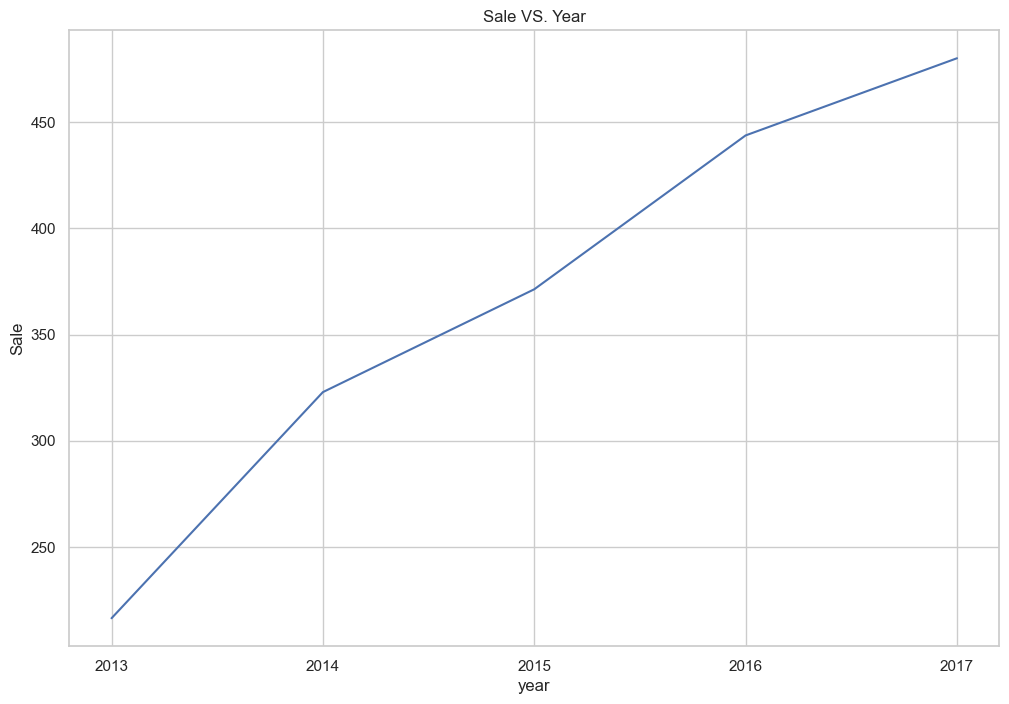

In [34]:
# Grouping by year and calculating the mean of sales, then plotting the result
train_df.groupby('year').sales.mean().sort_index().plot()
plt.title("Sale VS. Year")
plt.ylabel("Sale")
plt.xticks(np.sort(train_df.year.unique()))
plt.show()

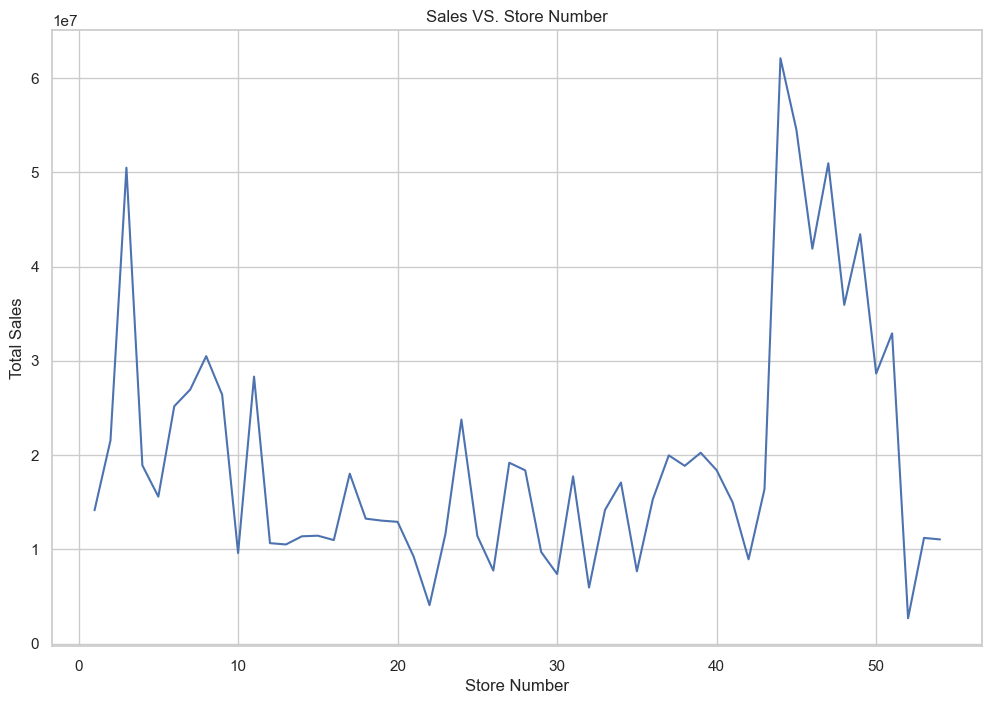

In [35]:
# Grouping by store_nbr and calculating the sum of sales, then plotting the result
train_df.groupby('store_nbr').sales.sum().sort_index().plot()
plt.title("Sales VS. Store Number")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.show()

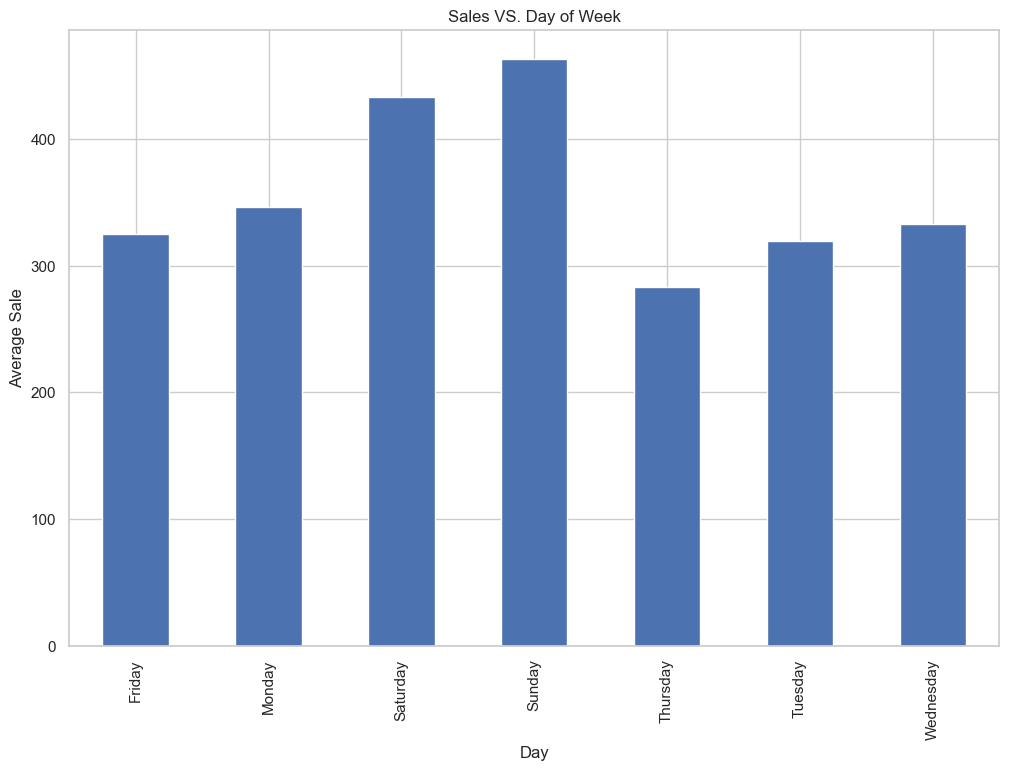

In [36]:
# Grouping by day_name and calculating the mean of sales, then plotting the result as a bar chart
train_df.groupby('day_name').sales.mean().plot(kind='bar')
plt.title("Sales VS. Day of Week")
plt.xlabel("Day")
plt.ylabel("Average Sale")
plt.show()

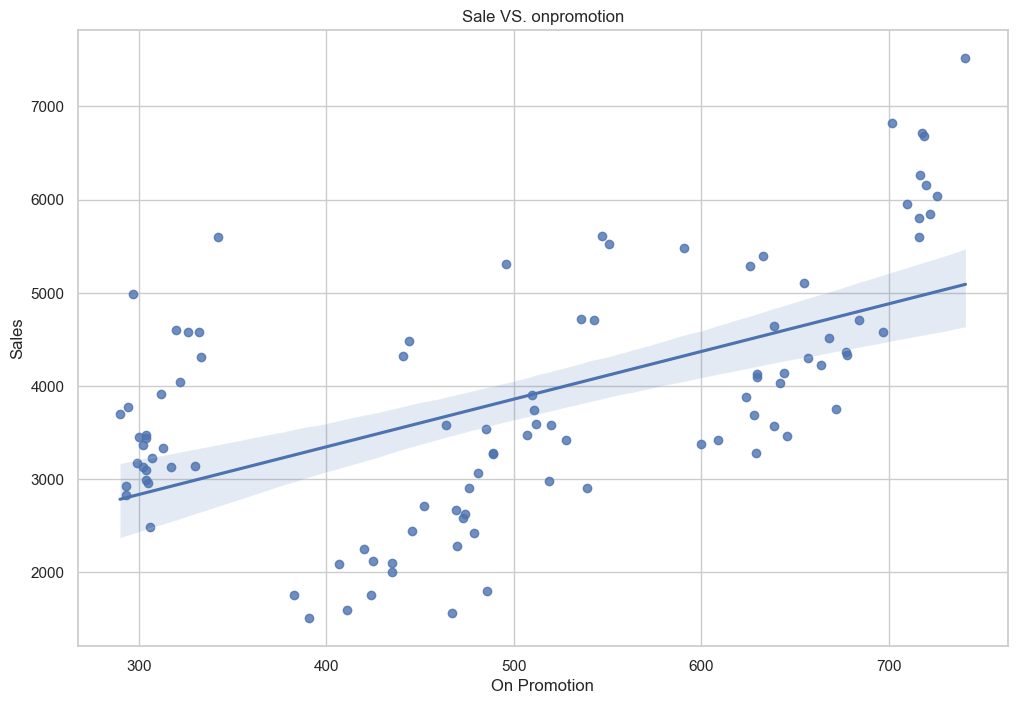

In [37]:
# Selecting the top 100 rows with the largest 'onpromotion' values
top_100_promotion = train_df.nlargest(100, 'onpromotion')

# Plotting a regression plot of 'sales' vs. 'onpromotion'
plt.title('Sale VS. onpromotion')
sns.regplot(data=top_100_promotion, x='onpromotion', y='sales')
plt.xlabel('On Promotion')
plt.ylabel('Sales')
plt.show()

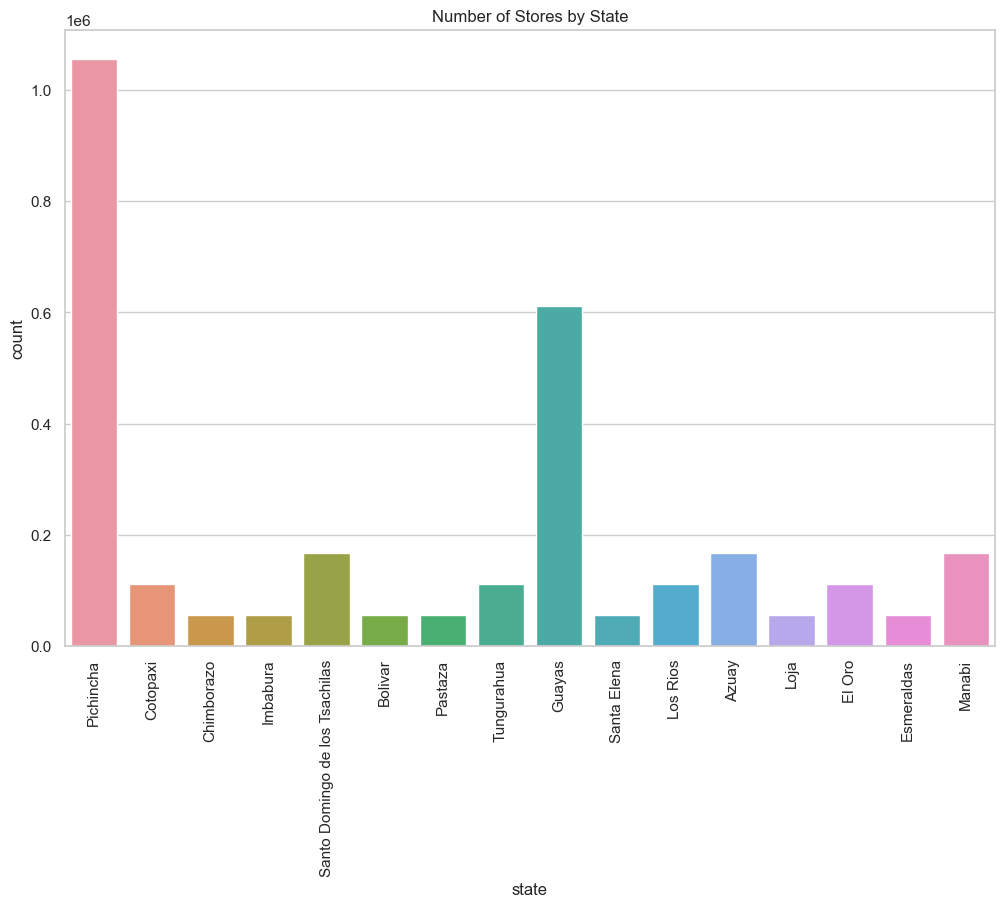

In [38]:
# Merge train_df with store_df on 'store_nbr' and plot the count of stores by state
sns.countplot(data=pd.merge(train_df, store_df, on='store_nbr'), x='state')
plt.xticks(rotation=90)
plt.title("Number of Stores by State")
plt.show()

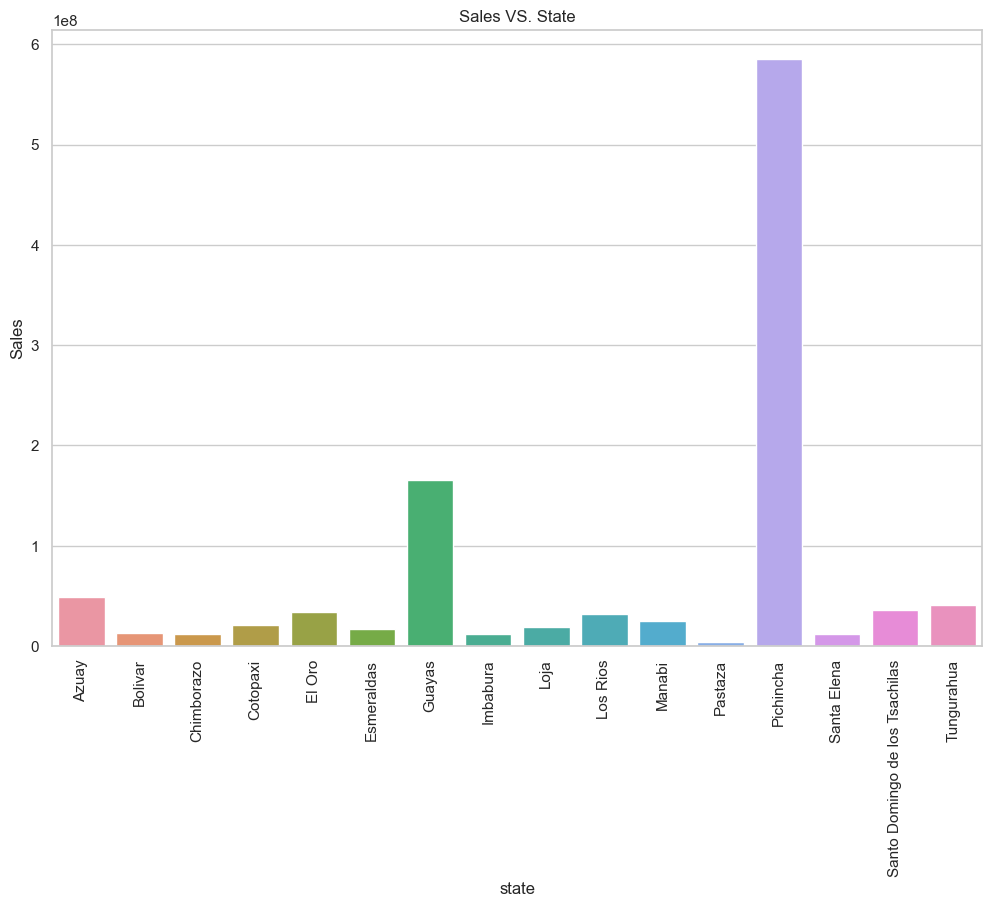

In [39]:
# Merge train_df with store_df on 'store_nbr', group by state, calculate the sum of sales, and plot as a barplot
state_sales = pd.merge(train_df, store_df, on='store_nbr').groupby('state').sales.sum().to_frame()
sns.barplot(data=state_sales, x=state_sales.sales.index, y=state_sales.sales.values)
plt.xticks(rotation=90)
plt.title("Sales VS. State")
plt.ylabel("Sales")
plt.show()

<Axes: >

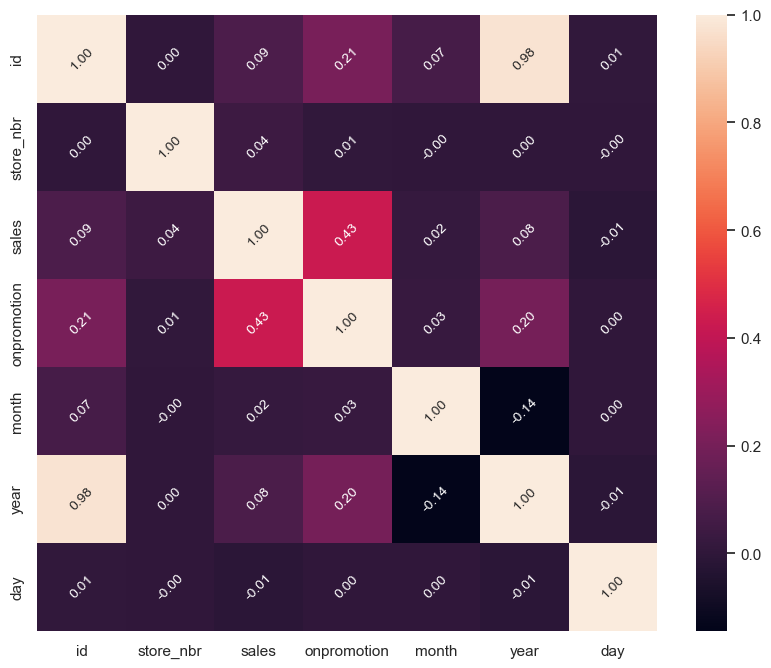

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, fmt=".2f", annot_kws={"size": 10, "rotation": 45})

- ### Data Visualization on Other Dataset

### 1) Transactions

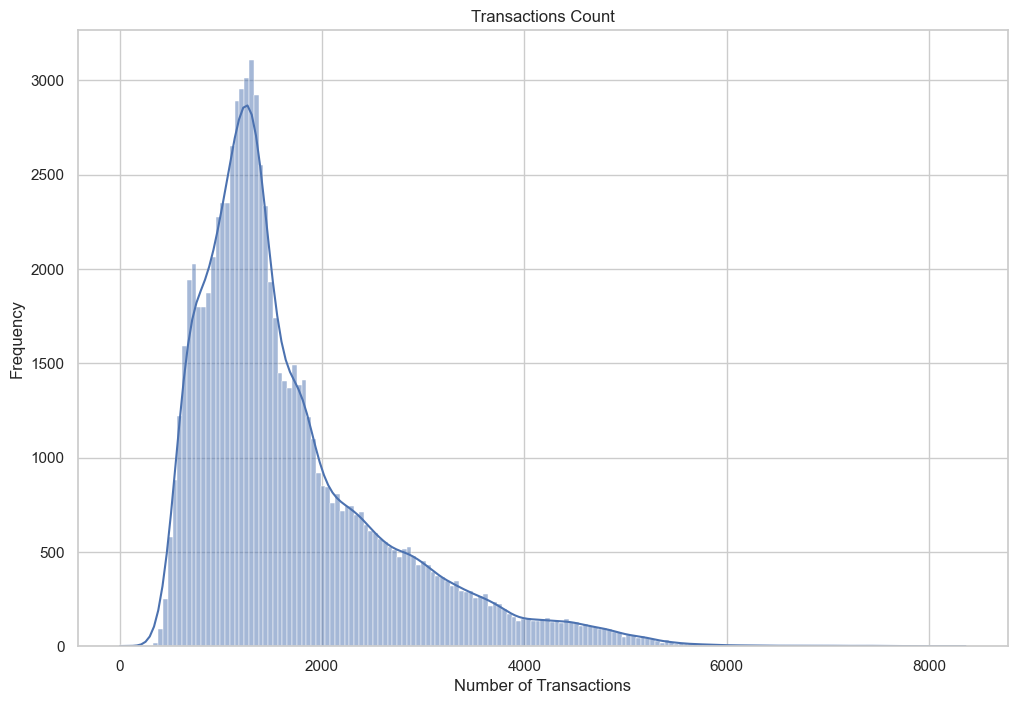

In [41]:
# Plotting a histogram of transactions with kernel density estimation (KDE)
sns.histplot(data=trans_df, x='transactions', kde=True)
plt.title("Transactions Count")
plt.xlabel("Number of Transactions")
plt.ylabel("Frequency")
plt.show()

### 2) Oil

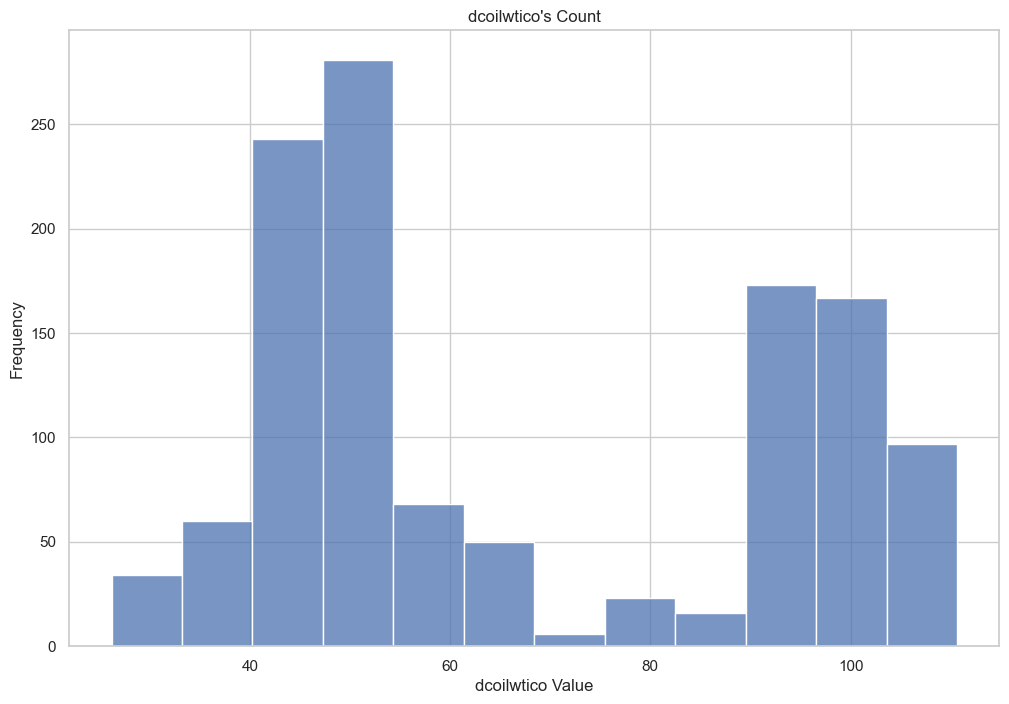

In [42]:
# Plotting a histogram of 'dcoilwtico'
sns.histplot(data=oil_df, x='dcoilwtico')
plt.title("dcoilwtico's Count")
plt.xlabel("dcoilwtico Value")
plt.ylabel("Frequency")
plt.show()

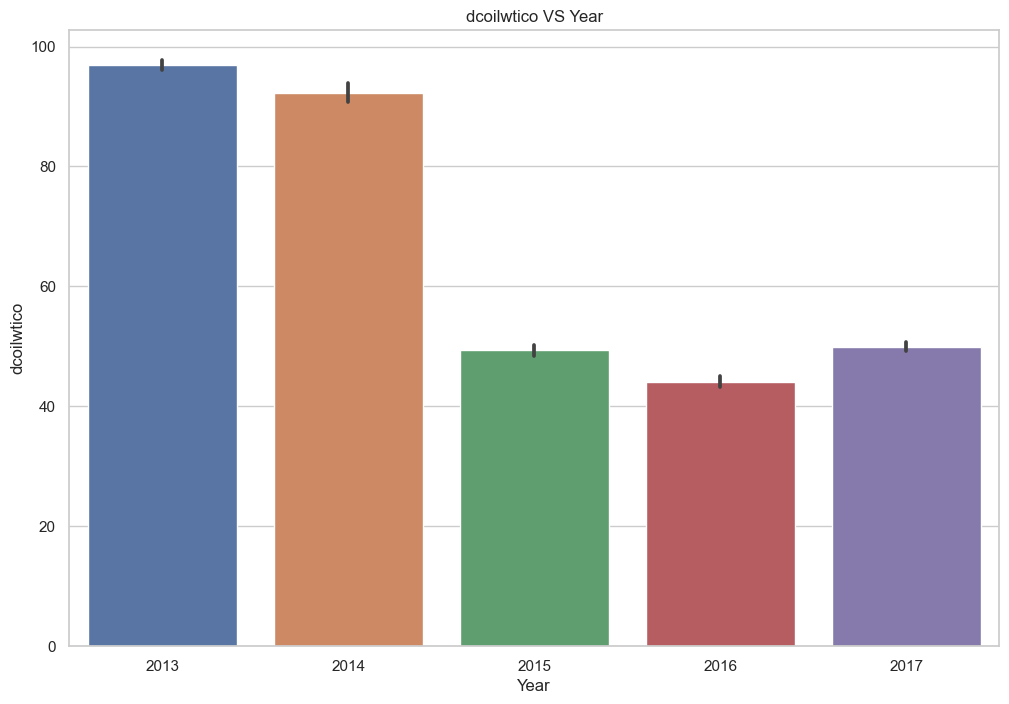

In [43]:
# Grouping by year and calculating the mean of 'dcoilwtico'
oil_group = oil_df.groupby('year')
dcoilwtico = oil_group.dcoilwtico.mean()

# Creating a bar plot using Seaborn
sns.barplot(data=oil_df, x='year', y='dcoilwtico')
plt.title('dcoilwtico VS Year')
plt.ylabel('dcoilwtico')
plt.xlabel("Year")
plt.show()

### 3) Holiday

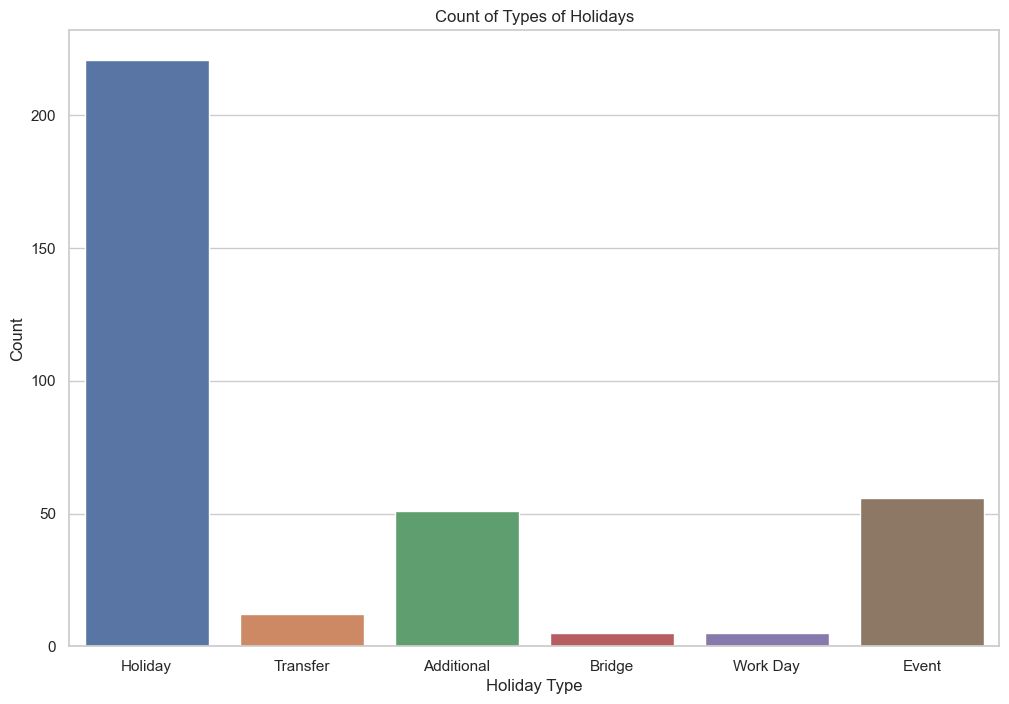

In [44]:
# Plotting the count of holiday types
sns.countplot(data=hol_df, x='type')
plt.title("Count of Types of Holidays")
plt.xlabel("Holiday Type")
plt.ylabel("Count")
plt.show()

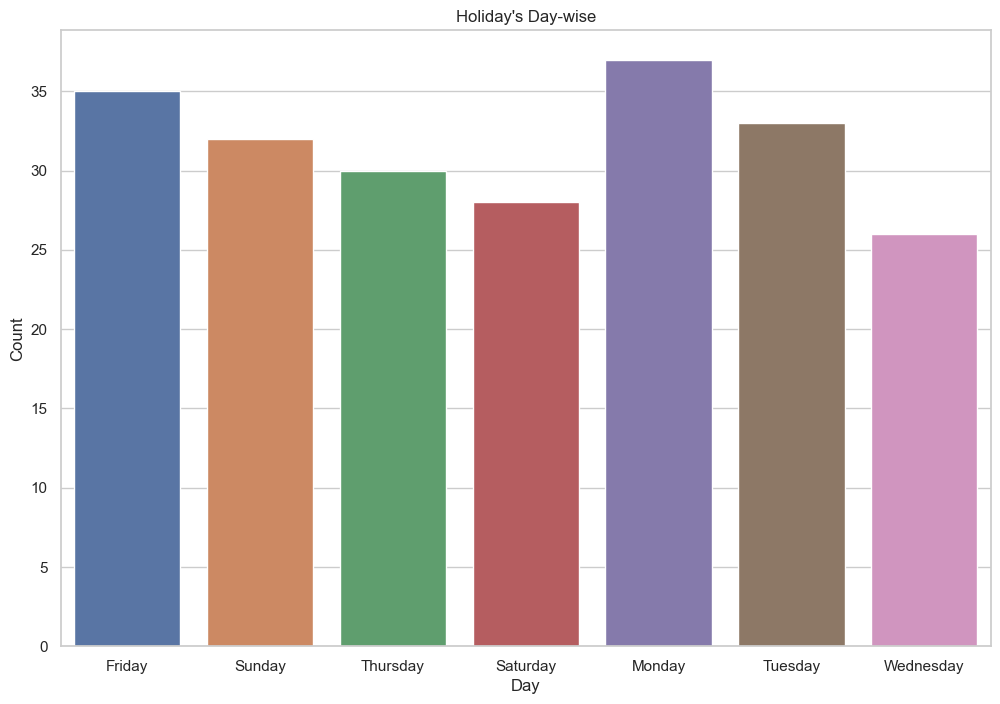

In [45]:
# Plotting the count of holidays by day
sns.countplot(data=hol_df[hol_df.type=='Holiday'], x='day')
plt.title("Holiday's Day-wise")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()

# 5) Data Processing

In [46]:
# Display the first 2 rows of the training dataset
print("\nFirst 2 rows of the training dataset:\n")
(train_df.head(2))


First 2 rows of the training dataset:



,id,date,store_nbr,family,sales,onpromotion,month,year,day_name,day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,Tuesday,1
1,1,2013-01-01,1,BABY CARE,0.0,0,1,2013,Tuesday,1


In [47]:
# Display the first 2 rows of the store dataset
print("\nFirst 2 rows of the store dataset:\n")
(store_df.head(2))


First 2 rows of the store dataset:



,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13


- ### Combining Two Dataframe

In [48]:
# Merge train_df with store_df on 'store_nbr' and assign the result to merged_df
merged_df = train_df.merge(store_df, on='store_nbr')

# Merge test_df with store_df on 'store_nbr' and assign the result to test_df
test_df = test_df.merge(store_df, on='store_nbr')

- ### Input and Target Columns

In [49]:
# Display the first 2 rows of the merged dataset
print("\nFirst 2 rows of the merged dataset:\n")
(merged_df.head(2))


First 2 rows of the merged dataset:



,id,date,store_nbr,family,sales,onpromotion,month,year,day_name,day,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,Tuesday,1,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,1,2013,Tuesday,1,Quito,Pichincha,D,13


In [50]:
# Display the columns of the merged dataset
print("\nColumns of the merged dataset:\n")
print(merged_df.columns)


Columns of the merged dataset:

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'month',
       'year', 'day_name', 'day', 'city', 'state', 'type', 'cluster'],
      dtype='object')


In [51]:
# Define the list of columns to drop
columns_to_drop = ['id','date', 'day', 'type', 'cluster']

# Drop the unwanted columns from the merged dataset
merged_df = merged_df.drop(columns=columns_to_drop, axis=1)

# Display the remaining columns in the DataFrame
print("\nRemaining columns in the merged dataset after dropping specified columns:\n")
print(merged_df.columns)


Remaining columns in the merged dataset after dropping specified columns:

Index(['store_nbr', 'family', 'sales', 'onpromotion', 'month', 'year',
       'day_name', 'city', 'state'],
      dtype='object')


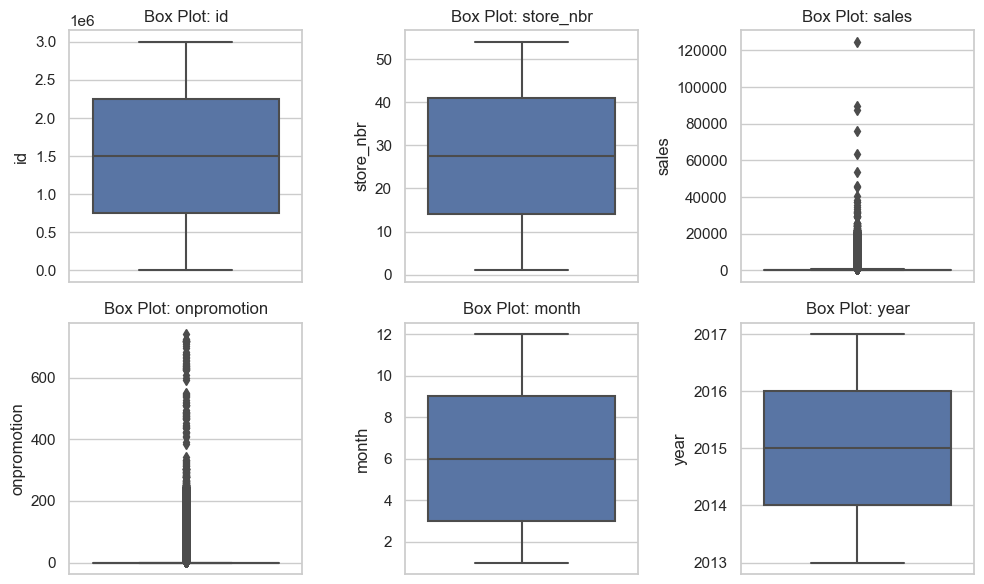

In [52]:
# Data Visualization - Box plot (after outlier removel)
column_names = ['id', 'store_nbr', 'sales', 'onpromotion', 'month','year']

# Create a figure with subplots for each column
plt.figure(figsize=(10, 6))

for i, column_name in enumerate(column_names):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=train_df[column_name])
    plt.title(f"Box Plot: {column_name}")


plt.tight_layout()
plt.show()

In [53]:
# Assuming merged_df is the DataFrame from which you want to remove outliers
columns_to_clean = ['sales', 'onpromotion']

# Loop through each column
for column_name in columns_to_clean:
    # Calculate the IQR based on merged_df
    Q1 = merged_df[column_name].quantile(0.25)
    Q3 = merged_df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outlier rows
    original_size = merged_df.shape[0]  # Store original row count
    merged_df = merged_df[(merged_df[column_name] >= lower_bound) & (merged_df[column_name] <= upper_bound)]
    new_size = merged_df.shape[0]  # Store new row count after removing outliers

    # Print the effect of outlier removal
    print(f"Column: {column_name}")
    print(f"Size before removing outliers: {original_size}")
    print(f"Size after removing outliers: {new_size}")
    print("Number of rows removed:", original_size - new_size)
    print("--------------------------")

Column: sales
Size before removing outliers: 3000888
Size after removing outliers: 2553783
Number of rows removed: 447105
--------------------------
Column: onpromotion
Size before removing outliers: 2553783
Size after removing outliers: 2211779
Number of rows removed: 342004
--------------------------


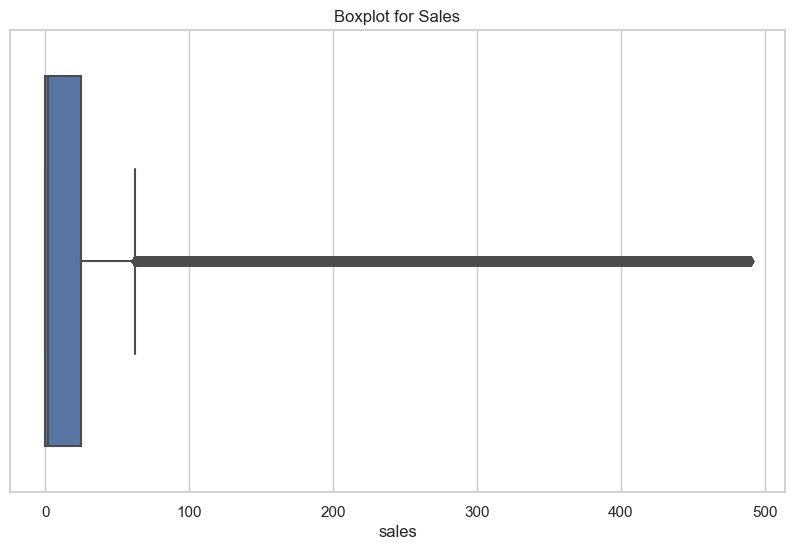

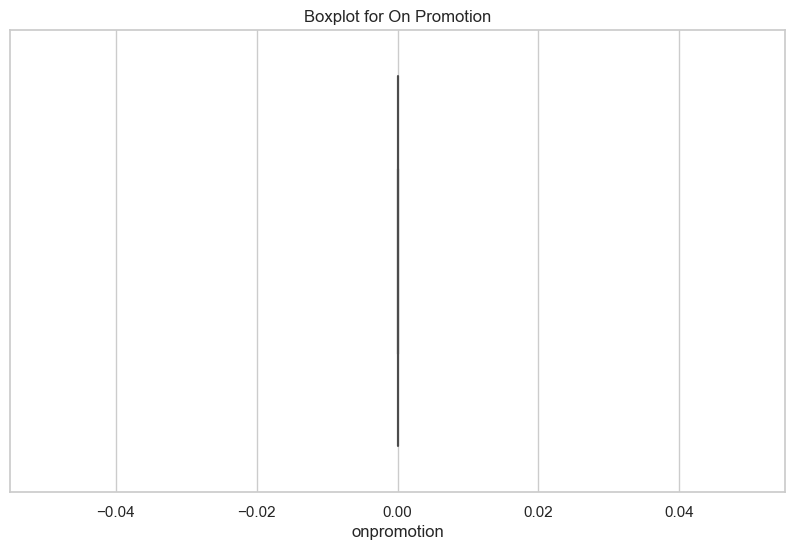

In [54]:
# Boxplot for the 'sales' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['sales'])
plt.title('Boxplot for Sales')
plt.show()

# Boxplot for the 'onpromotion' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['onpromotion'])
plt.title('Boxplot for On Promotion')
plt.show()

# 6) Feature Engineering

In [55]:
# Display the columns of the merged dataset
print("\nColumns of the merged dataset:\n")
print(merged_df.columns)


Columns of the merged dataset:

Index(['store_nbr', 'family', 'sales', 'onpromotion', 'month', 'year',
       'day_name', 'city', 'state'],
      dtype='object')


In [56]:
# Define input columns and target column
input_cols = ['store_nbr', 'family', 'onpromotion', 'month', 'year', 'day_name', 'city', 'state']
target_col = ['sales']

# Selecting input and target columns from the merged dataset
X = merged_df[input_cols]
y = merged_df[target_col]

# Displaying the shape of input and target data
print("Shape of input data (X):", X.shape)
print("Shape of target data (y):", y.shape)

Shape of input data (X): (2211779, 8)
Shape of target data (y): (2211779, 1)


In [57]:
# Display the shape of the merged dataset
print("\nShape of the merged dataset:\n")
print(merged_df.shape)


Shape of the merged dataset:

(2211779, 9)


In [58]:
# Create a sample DataFrame containing 10% of the rows from merged_df
sample_df = merged_df.sample(frac=0.1, random_state=42).copy()

# Display the shape of the sample DataFrame
print("\nShape of the sample DataFrame:\n")
print(sample_df.shape)


Shape of the sample DataFrame:

(221178, 9)


In [59]:
# Train dataset: Extracting input features and target variable
inputs = merged_df[input_cols].copy()  # Features for training
target = merged_df[target_col].copy()  # Target variable for training

# Sample dataset: Extracting input features and target variable
inputs_sample = sample_df[input_cols].copy()  # Features for sample
target_sample = sample_df[target_col].copy()  # Target variable for sample

# Test dataset: Extracting input features
test_inputs = test_df[input_cols].copy()  # Features for testing

- ### Input and Target Columns

In [60]:
# Select numeric columns
numeric_cols = inputs.select_dtypes(np.number).columns.tolist()

# Select categorical columns
categorical_cols = inputs.select_dtypes('object').columns.tolist()

In [61]:
# Determine the number of numeric and categorical columns
num_numeric_cols = len(numeric_cols)
num_categorical_cols = len(categorical_cols)

# Print the results
print("Number of numeric columns:", num_numeric_cols)
print("Number of categorical columns:", num_categorical_cols)

Number of numeric columns: 4
Number of categorical columns: 4


In [62]:
# Display the shape of the inputs DataFrame
print("\nShape of the inputs DataFrame:\n")
print(inputs.shape)


Shape of the inputs DataFrame:

(2211779, 8)


- ### Imputing Missing Values

In [63]:
# Count the number of missing values in numeric columns of the inputs DataFrame
missing_numeric_values = inputs[numeric_cols].isna().sum()

# Display the result
print("\nNumber of missing values in numeric columns of the inputs DataFrame:\n")
print(missing_numeric_values)


Number of missing values in numeric columns of the inputs DataFrame:

store_nbr      0
onpromotion    0
month          0
year           0
dtype: int64


There is no missing values in Numeric columns

In [64]:
# Count the number of missing values in categorical columns of the inputs DataFrame
missing_categorical_values = inputs[categorical_cols].isna().sum()

# Display the result
print("\nNumber of missing values in categorical columns of the inputs DataFrame:\n")
print(missing_categorical_values)


Number of missing values in categorical columns of the inputs DataFrame:

family      0
day_name    0
city        0
state       0
dtype: int64


There is no missing value in Categorical columns

In [65]:
# Count the number of missing values in each column of the test_inputs DataFrame
missing_values_test = test_inputs.isna().sum()

# Display the result
print("\nNumber of missing values in each column of the test_inputs DataFrame:\n")
print(missing_values_test)


Number of missing values in each column of the test_inputs DataFrame:

store_nbr      0
family         0
onpromotion    0
month          0
year           0
day_name       0
city           0
state          0
dtype: int64


There is no missing value in test_df

There is no any missing value in any columns of inputs

- ### Scaling the Numeric columns

In [66]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the numeric columns of merged_df
scaler.fit(merged_df[numeric_cols])

StandardScaler()

In [67]:
# Original Dataset: Scale numeric columns
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

# Sample Dataset: Scale numeric columns
inputs_sample[numeric_cols] = scaler.transform(inputs_sample[numeric_cols])

- ### Encoder for Categorical Columns

In [68]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder to the categorical columns of merged_df
encoder.fit(merged_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [69]:
# Generate a list of encoded column names
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [70]:
# Original Dataset: Transform categorical columns into one-hot encoded features
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

# Sample Dataset: Transform categorical columns into one-hot encoded features
inputs_sample[encoded_cols] = encoder.transform(inputs_sample[categorical_cols])

In [71]:
# After Transforming the size of DataFrame
inputs.shape,test_inputs.shape

((2211779, 86), (28512, 86))

In [72]:
# Original Dataset: Select required columns
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

# Sample Dataset: Select required columns
X_sample = inputs_sample[numeric_cols + encoded_cols]

In [73]:
# Check the shape of the selected features for the original dataset
print("Shape of selected features for the original dataset (X):", X.shape)

# Check the shape of the selected features for the test dataset
print("Shape of selected features for the test dataset (X_test):", X_test.shape)

Shape of selected features for the original dataset (X): (2211779, 82)
Shape of selected features for the test dataset (X_test): (28512, 82)


# 7) Feature Selection

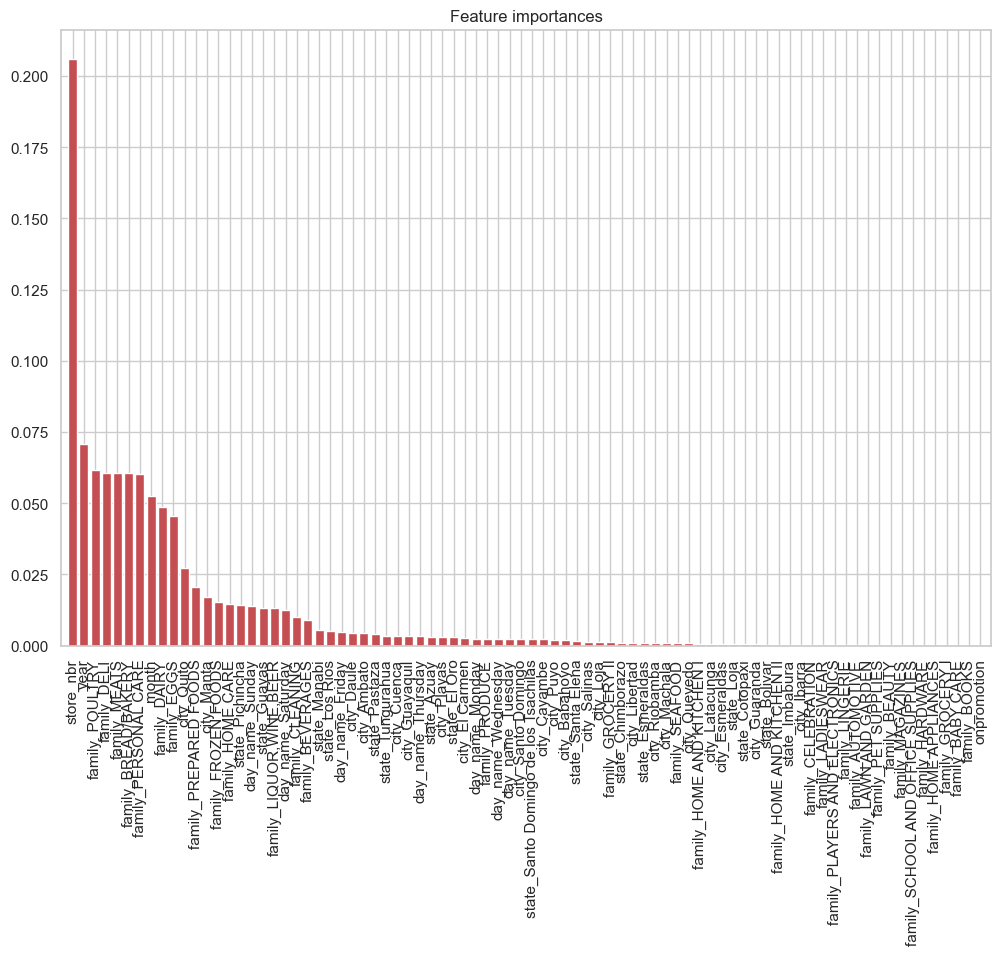

In [74]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are already defined
model = RandomForestRegressor(n_estimators=5, random_state=42)
model.fit(X, y.values.ravel())

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# 8) Dimensional Reduction

In [75]:
from sklearn.decomposition import PCA

# Let's assume you want to keep 95% of the variance
pca = PCA(n_components=0.95)

# Fit PCA on the training set only to prevent data leakage
X_pca = pca.fit_transform(X)

# Transform the test set with the already fitted PCA
X_test_pca = pca.transform(X_test)

# Transform the sample set with the already fitted PCA (if necessary)
X_sample_pca = pca.transform(X_sample)

print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features: {X_pca.shape[1]}")


Original number of features: 82
Reduced number of features: 45


# 9) Model Creation and Evaluation

In [76]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=42)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

models = {
    "LGBMRegressor": LGBMRegressor(random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return y_pred, rmse, mae, r2  # Return predictions as well

# Evaluate each model and save submission for LGBMRegressor
results = {}
submission = None  # Placeholder for LGBMRegressor predictions
for name, model in models.items():
    y_pred, rmse, mae, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {"RMSE": rmse, "MAE": mae, "R²": r2}
    if name == "LGBMRegressor":
        submission = y_pred  

# Display results
for model in results:
    print(f"Model: {model}")
    for metric in results[model]:
        print(f"{metric}: {results[model][metric]}")
    print("\n")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.446783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11475
[LightGBM] [Info] Number of data points in the train set: 1769423, number of used features: 45
[LightGBM] [Info] Start training from score 41.807467
Model: LGBMRegressor
RMSE: 39.47370901363912
MAE: 18.655343133394727
R²: 0.8083414884242002




In [77]:
import pickle  # Import the pickle module

# Save the LGBMRegressor predictions to a CSV file
if submission is not None:
    submission_df = pd.DataFrame(submission, columns=['Prediction'])
    submission_df.to_csv('LGBMRegressor_Submission.csv', index=False)
    print("LGBMRegressor submission file saved as LGBMRegressor_Submission.csv")
else:
    print("No LGBMRegressor predictions to save.")


# Save the LGBMRegressor model to a pickle file
model_filename = 'LGBMRegressor_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as {model_filename}")

LGBMRegressor submission file saved as LGBMRegressor_Submission.csv
Model saved as LGBMRegressor_model.pkl


In [78]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=42)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

models = {
    "XGBRegressor": XGBRegressor(random_state=42)
}

# Function to evaluate models and return predictions
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return y_pred, rmse, mae, r2

# Evaluate each model and prepare to save submission for XGBRegressor
results = {}
submission_pred = None  # Initialize to None to store predictions
for name, model in models.items():
    y_pred, rmse, mae, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {"RMSE": rmse, "MAE": mae, "R²": r2}
    if name == "XGBRegressor":
        submission_pred = y_pred  # Save predictions for XGBRegressor

# Display results
for model in results:
    print(f"Model: {model}")
    for metric in results[model]:
        print(f"{metric}: {results[model][metric]}")
    print("\n")

Model: XGBRegressor
RMSE: 32.4089148859192
MAE: 15.274283535376071
R²: 0.870806334306335




In [79]:
import pickle  # Import the pickle module

# Save the XGBRegressor predictions to a CSV file
if submission_pred is not None:
    submission_df = pd.DataFrame(submission_pred, columns=['Prediction'])
    submission_df.to_csv('XGBRegressor_Submission.csv', index=False)
    print("XGBRegressor submission file saved as XGBRegressor_Submission.csv")
else:
    print("No XGBRegressor predictions to save.")

model = models["XGBRegressor"]

# Save the XGBRegressor model to a pickle file
model_filename = 'XGBRegressor_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as {model_filename}")
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

XGBRegressor submission file saved as XGBRegressor_Submission.csv
Model saved as XGBRegressor_model.pkl


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=42)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

models = {
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42)
}

# Function to evaluate models and return predictions
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return y_pred, rmse, mae, r2  


# Evaluate each model and prepare to save submission for DecisionTreeRegressor
results = {}
submission_pred = None  # Initialize to None to store predictions
for name, model in models.items():
    y_pred, rmse, mae, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {"RMSE": rmse, "MAE": mae, "R²": r2}
    if name == "DecisionTreeRegressor":
        submission_pred = y_pred  # Save predictions for DecisionTreeRegressor

# Display results
for model in results:
    print(f"Model: {model}")
    for metric in results[model]:
        print(f"{metric}: {results[model][metric]}")
    print("\n")

Model: DecisionTreeRegressor
RMSE: 26.58023232952956
MAE: 9.601719550383214
R²: 0.9130979971702421




In [81]:
 import pickle # Import the pickle module

# Save the DecisionTreeRegressor predictions to a CSV file
if submission_pred is not None:
    submission_df = pd.DataFrame(submission_pred, columns=['Prediction'])
    submission_df.to_csv('DecisionTreeRegressor_Submission.csv', index=False)
    print("DecisionTreeRegressor submission file saved as DecisionTreeRegressor_Submission.csv")
else:
    print("No DecisionTreeRegressor predictions to save.")
    
model = models["DecisionTreeRegressor"]

# Save the DecisionTreeRegressor model to a pickle file
model_filename = 'DecisionTreeRegressor_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as {model_filename}")

with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('pca_model.pkl', 'wb') as f:
    pickle.dump(pca, f)

DecisionTreeRegressor submission file saved as DecisionTreeRegressor_Submission.csv
Model saved as DecisionTreeRegressor_model.pkl


In [82]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import pickle

X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=42)

# Initialize CatBoostRegressor
model = CatBoostRegressor(random_state=42, verbose=0) 

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

RMSE: 31.365081122303742
MAE: 14.791340712687365
R^2: 0.8789945110988058


In [83]:
# Save the predictions to a CSV file
submission_df = pd.DataFrame(y_pred, columns=['Prediction'])
submission_df.to_csv('CatBoostRegressor_Submission.csv', index=False)
print("CatBoostRegressor submission file saved as CatBoostRegressor_Submission.csv")

# Save the model to a pickle file
model_filename = 'CatBoostRegressor_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)
print(f"Model saved as {model_filename}")

CatBoostRegressor submission file saved as CatBoostRegressor_Submission.csv
Model saved as CatBoostRegressor_model.pkl


# 10) Hyperparameter

In [84]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=42)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

model = XGBRegressor(random_state=42)

param_dist = {
 
     'n_estimators': [500, 800],  
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]

}

# Setup the randomized search with 5-fold cross validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=5, scoring='neg_mean_squared_error', 
                                   cv=5, verbose=1, random_state=42, n_jobs=-1)

# Perform the randomized search
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Lowest RMSE found: ", sqrt(-random_search.best_score_))

# Evaluate the best model found by the random search on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics for the best model
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test R^2: {r2}")

# Save the XGBRegressor predictions to a CSV file
submission_df = pd.DataFrame(y_pred, columns=['Prediction'])
submission_df.to_csv('Tuned_XGBRegressor_Submission.csv', index=False)
print("XGBRegressor submission file saved as XGBRegressor_Submission.csv")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found:  {'subsample': 0.7, 'n_estimators': 800, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}
Lowest RMSE found:  23.42672330084995
Test RMSE: 23.063999861438266
Test MAE: 9.350751161679993
Test R^2: 0.9345693109346873
XGBRegressor submission file saved as XGBRegressor_Submission.csv


# 11) Model Comparison

                   Model       RMSE        MAE        R²
0          LGBMRegressor  39.473709  18.655343  0.808341
1     Tuned-XGBRegressor  23.064000   9.350751  0.934569
2  DecisionTreeRegressor  26.580232   9.601720  0.913098
3      CatBoostRegressor  31.365081  14.791341  0.878995


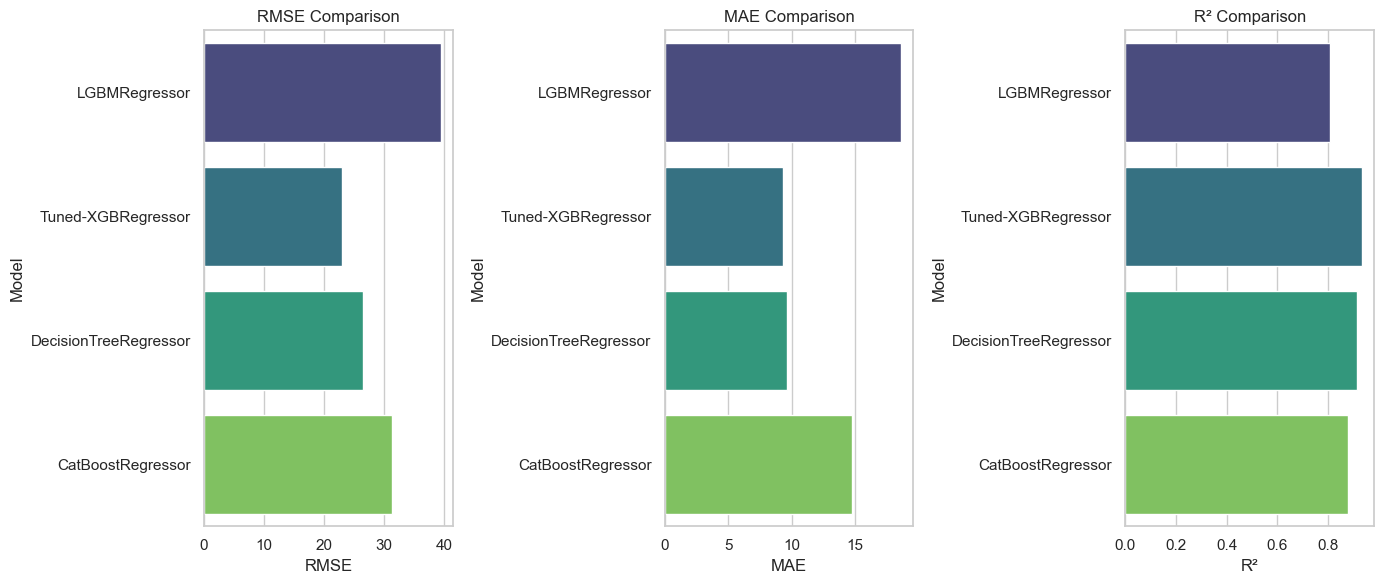

In [86]:
# Compiling model performance metrics into a DataFrame
model_performance = {
    'Model': ['LGBMRegressor', 'Tuned-XGBRegressor', 'DecisionTreeRegressor', 'CatBoostRegressor'],
    'RMSE': [39.47370901363912, 23.063999861438266, 26.58023232952956, 31.365081122303742],
    'MAE': [18.655343133394727, 9.350751161679993, 9.601719550383214, 14.791340712687365],
    'R²': [0.8083414884242002, 0.9345693109346873, 0.9130979971702421, 0.8789945110988058]
}

performance_df = pd.DataFrame(model_performance)

# Display the DataFrame for preview
print(performance_df)

# Plotting
plt.figure(figsize=(14, 6))

# Plot for RMSE
plt.subplot(1, 3, 1)
sns.barplot(x='RMSE', y='Model', data=performance_df, palette='viridis')
plt.title('RMSE Comparison')

# Plot for MAE
plt.subplot(1, 3, 2)
sns.barplot(x='MAE', y='Model', data=performance_df, palette='viridis')
plt.title('MAE Comparison')

# Plot for R²
plt.subplot(1, 3, 3)
sns.barplot(x='R²', y='Model', data=performance_df, palette='viridis')
plt.title('R² Comparison')

plt.tight_layout()
plt.show()

# 12) Final Model Selection

In [87]:
# Compiling model performance metrics into a DataFrame
model_performance = {
    'Model': ['LGBMRegressor', 'Tuned-XGBRegressor', 'DecisionTreeRegressor', 'CatBoostRegressor'],
    'RMSE': [42.47455477081885, 21.350308550371473, 29.217988763032324, 33.08302423433348],
    'MAE': [20.157058352597137, 9.11620325002273, 10.652596998559986, 15.853026076223955],
    'R²': [0.7780935576436525, 0.943931291584136, 0.8949942996486182, 0.86537595157268]
}

performance_df = pd.DataFrame(model_performance)

# Here, prioritize RMSE but also keep R² in consideration
best_model_based_on_rmse = performance_df.loc[performance_df['RMSE'].idxmin()]
best_model_based_on_r2 = performance_df.loc[performance_df['R²'].idxmax()]

# Print the best model based on RMSE
print("Best model based on RMSE:")
print(best_model_based_on_rmse)

# Define an acceptable RMSE range (within 10% of the best RMSE)
acceptable_rmse_range = best_model_based_on_rmse['RMSE'] * 1.10

# Filter models within this acceptable range
acceptable_models = performance_df[performance_df['RMSE'] <= acceptable_rmse_range]

# Find the model with the highest R² within this acceptable range
if not acceptable_models.empty:
    best_model_overall = acceptable_models.loc[acceptable_models['R²'].idxmax()]
    print("\nConsidering both RMSE (within 10% of the best) and R², the best model is:")
    print(best_model_overall)
else:
    print("\nBased on RMSE alone, the best model is:")
    print(best_model_based_on_rmse)

Best model based on RMSE:
Model    Tuned-XGBRegressor
RMSE              21.350309
MAE                9.116203
R²                 0.943931
Name: 1, dtype: object

Considering both RMSE (within 10% of the best) and R², the best model is:
Model    Tuned-XGBRegressor
RMSE              21.350309
MAE                9.116203
R²                 0.943931
Name: 1, dtype: object
